In [1]:
import collections
import time
import argparse
import sys
import networkx as nx
import json
import numpy as np
import random
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

In [2]:
def load_json(file_path):
    try:
        f = open(file_path, 'r', encoding="utf8")
    except:
        print("Could not open file: " + file_path)
        sys.exit(-1)

    try:
        json_data =json.load(f)
    except:
        print("Could not parse JSON!")
        sys.exit(-1)

    for item in json_data['edges']:
        if item['capacity']:
            item['capacity'] = int(item['capacity'])

    return json_data


In [3]:
def remove_single_components(G):
    list_conn = list(nx.connected_components(G))
    count = 0
    for entry in list_conn:
        if entry != max(list_conn, key=len):
            for setentry in entry:
                G.remove_node(setentry)
                count += 1


In [4]:
def reachable_nodes(G):
    copy_G = G.copy()
    remove_single_components(copy_G)
    ccs = list(nx.connected_components(copy_G))
    assert(len(ccs) == 1)
    return len(ccs[0])


In [5]:
def average_max_flow(G, num_samples, round):
    copy_G = G.copy()
    nodes = list(copy_G.nodes())
    max_flow_value = 0
    random.seed(round)
    for _ in range(num_samples):
        s = random.choice(nodes)
        t = random.choice(nodes)
        while (s == t):
            t = random.choice(nodes)
        max_flow_value = max_flow_value + nx.maximum_flow_value(copy_G, s, t,capacity='capacity')
    random.seed(time.time())
    return max_flow_value/num_samples


In [6]:
def load_graph(json_data):
    G = json_graph.node_link_graph(json_data, False, False, {'name':'pub_key', 'source':'node1_pub', 'target':'node2_pub', 'key':'channel_id', 'link':'edges'})
    return G

In [7]:
parser = argparse.ArgumentParser(description='Lightning Network analysis')
parser.add_argument('-f', '--file', type=str, help='the LN graph in JSON format', default="lngraph.json")

_StoreAction(option_strings=['-f', '--file'], dest='file', nargs=None, const=None, default='lngraph.json', type=<class 'str'>, choices=None, help='the LN graph in JSON format', metavar=None)

In [8]:
args = parser.parse_args()
json_data = load_json("lngraph.json")
G = load_graph(json_data)

Could not open file: lngraph.json


SystemExit: -1

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
num_edges = nx.number_of_edges(G)
num_nodes = nx.number_of_nodes(G)
print("Number of Edges : ")
print(num_edges)
print("Number of Nodes : ")
print(num_nodes)

NameError: name 'G' is not defined

In [10]:
#Now to recognize the top 200 highest degree nodes.
sorteddegree = sorted(G.degree, key=lambda x: x[1], reverse = True)
sorteddegree = sorteddegree[0:200]

In [11]:
Atemp = G.copy()
sorteddegree

[('02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b', 938),
 ('03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f', 782),
 ('0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4', 694),
 ('0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c', 645),
 ('0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266', 619),
 ('02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8', 578),
 ('0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0', 455),
 ('03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618', 442),
 ('02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469', 420),
 ('032679fec1213e5b0a23e066c019d7b991b95c6e4d28806b9ebd1362f9e32775cf', 415),
 ('03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d', 414),
 ('03fb822818be083e0a954db85257a2911a3d55458b8c1ea4124b157e865a836d12', 353),
 ('031ce29116eab7edd66148f5169f1fb658fad62bdc5091221ab895fe5d36d

In [12]:
degreeDec = np.empty([1,200])

In [13]:
#Removing Nodes one by one according to decreasing degree
#Storing new values of remaining edges
for i in range(200):
    Atemp.remove_node(sorteddegree[i][0])
    degreeDec[0][i] = Atemp.number_of_edges()

In [14]:
Atemp.number_of_edges() #ATEMP FOR NODE DEGREE

3293

In [15]:
Atemp.number_of_nodes()

3063

In [16]:
G.number_of_edges()

25576

In [17]:
G.number_of_nodes()

3263

Text(0.5, 0, 'Number of Nodes Removed')

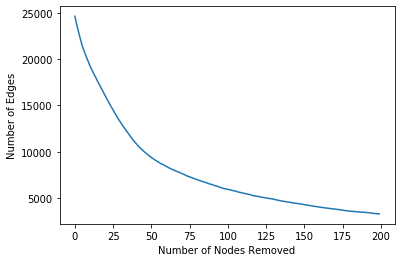

In [18]:
plt.plot(degreeDec[0])
plt.ylabel('Number of Edges')
plt.xlabel('Number of Nodes Removed')

In [94]:
sbetween = nx.betweenness_centrality(G,k=3263)

In [95]:
sbetween

{'0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1': 0.0012079102217842322,
 '02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c': 0.0032177158685468615,
 '02005dcac896582db30f259c17bba1849a9e1127f60d120ec7db69c17ce64d749d': 9.933833684095448e-06,
 '02009947c197575f5a948e1e4343c41dc2e6122a9bd644629afb919f30e1115ff8': 0.0006218180557384795,
 '0200c06eaaef0ffc98447b5f0c5810c8325fc50fba4c509ebf558d67d1f088bdad': 0.0002806310405552906,
 '0200da31ae309a42f955de9383c150a4167246bb22d5380898cd70aecc59136c50': 3.580832370580868e-07,
 '0200dfda3cb0250b2d801d200155ec056958cf598a30ffd36c207340cb9f6645a3': 7.906023957070002e-05,
 '020164d1a57b1af439a3a682c14369d6381b9e41bea956e42b8e9ea2b375cb85d0': 0.0009059633904108641,
 '02016cd83b8638c08d702abdd48b44495cf957d5947a7e10701a53cc298a5e93b6': 2.6823037927017244e-06,
 '02018049d12985e79e36d12428b78c90a81ff4ab43431f3c81afb86caaccaaffb0': 1.9938631544092028e-05,
 '0201cc5c237368165ca4221526596205b4d747602c837e327621f19b

In [96]:
sbetweensorted = {k: v for k, v in reversed(sorted(sbetween.items(), key=lambda item: item[1]))}
sbetweensorted

{'02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b': 0.14009759519630932,
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f': 0.12294357503476347,
 '0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c': 0.11365523538612232,
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266': 0.07888510394967704,
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4': 0.07191418250784998,
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8': 0.04944493690759375,
 '03a503d8e30f2ff407096d235b5db63b4fcf3f89a653acb6f43d3fc492a7674019': 0.038752217566180046,
 '032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada': 0.03786543579308708,
 '03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618': 0.03639817531118105,
 '0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0': 0.033032988725418766,
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d': 0.03197

In [97]:
x = list(sbetweensorted.keys())
x

['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c',
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4',
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8',
 '03a503d8e30f2ff407096d235b5db63b4fcf3f89a653acb6f43d3fc492a7674019',
 '032b2b3f4abda9677bb9563e226c068d3a2456fb8b036635a81c9bcaa1671d1ada',
 '03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618',
 '0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0',
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d',
 '03cb7983dc247f9f81a0fa2dfa3ce1c255365f7279c8dd143e086ca333df10e278',
 '02cdf83ef8e45908b1092125d25c68dcec7751ca8d39f557775cd842e5bc127469',
 '0327049d8d63f0c40193cdf3afc61817c8647808a4e482de0716fcef74e6d92ebf',
 '028d

In [98]:
degdec = np.empty([1,200])
Btemp = G.copy() #BTEMP FOR BETWEENNESS CENTRALITY
Btemp.number_of_edges()
x=x[0:200]
len(x)

200

In [99]:
p = 0
for i in x:
    Btemp.remove_node(i)
    degdec[0][p] = Btemp.number_of_edges()
    p = p + 1
p = 0


Text(0.5, 0, 'No of Nodes Removed')

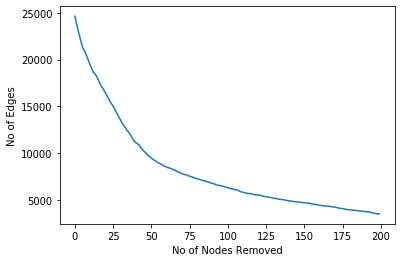

In [100]:
plt.plot(degdec[0])
plt.ylabel("No of Edges")
plt.xlabel("No of Nodes Removed")

In [101]:
#Now to identify the top 100 highest eigenvector centrality nodes
ecentral = nx.eigenvector_centrality(G)

In [102]:
ecentral

{'0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1': 0.037207175142873444,
 '02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c': 0.025338938985549106,
 '02005dcac896582db30f259c17bba1849a9e1127f60d120ec7db69c17ce64d749d': 0.0015074405561345957,
 '02009947c197575f5a948e1e4343c41dc2e6122a9bd644629afb919f30e1115ff8': 0.004959324820389792,
 '0200c06eaaef0ffc98447b5f0c5810c8325fc50fba4c509ebf558d67d1f088bdad': 0.009803125097418482,
 '0200da31ae309a42f955de9383c150a4167246bb22d5380898cd70aecc59136c50': 0.00015072695152239517,
 '0200dfda3cb0250b2d801d200155ec056958cf598a30ffd36c207340cb9f6645a3': 0.023962516320551484,
 '020164d1a57b1af439a3a682c14369d6381b9e41bea956e42b8e9ea2b375cb85d0': 0.035046937909452965,
 '02016cd83b8638c08d702abdd48b44495cf957d5947a7e10701a53cc298a5e93b6': 0.0029835724452522243,
 '02018049d12985e79e36d12428b78c90a81ff4ab43431f3c81afb86caaccaaffb0': 0.00420193064254313,
 '0201cc5c237368165ca4221526596205b4d747602c837e327621f19b7b415aa1f

In [103]:
ecentralsorted = {k: v for k, v in reversed(sorted(ecentral.items(), key=lambda item: item[1]))}
ecentralsorted

{'02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b': 0.18261280462544596,
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f': 0.1629236469971442,
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4': 0.15638607617352016,
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8': 0.14727792148759866,
 '032679fec1213e5b0a23e066c019d7b991b95c6e4d28806b9ebd1362f9e32775cf': 0.1314547406014199,
 '0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0': 0.12777954392487445,
 '03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618': 0.12149796213337698,
 '031ce29116eab7edd66148f5169f1fb658fad62bdc5091221ab895fe5d36db00b2': 0.12049838794974393,
 '0303a518845db99994783f606e6629e705cfaf072e5ce9a4d8bf9e249de4fbd019': 0.11944248910174814,
 '03da1c27ca77872ac5b3e568af30673e599a47a5e4497f85c7b5da42048807b3ed': 0.11925916620515856,
 '03fce165537aea120bffe8505876b44d5119354f825b3eac329b761fc5636bf334': 0.119171149

In [104]:
x = list(ecentralsorted.keys())
x

['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4',
 '02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8',
 '032679fec1213e5b0a23e066c019d7b991b95c6e4d28806b9ebd1362f9e32775cf',
 '0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0',
 '03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618',
 '031ce29116eab7edd66148f5169f1fb658fad62bdc5091221ab895fe5d36db00b2',
 '0303a518845db99994783f606e6629e705cfaf072e5ce9a4d8bf9e249de4fbd019',
 '03da1c27ca77872ac5b3e568af30673e599a47a5e4497f85c7b5da42048807b3ed',
 '03fce165537aea120bffe8505876b44d5119354f825b3eac329b761fc5636bf334',
 '03bc9337c7a28bb784d67742ebedd30a93bacdf7e4ca16436ef3798000242b2251',
 '030995c0c0217d763c2274aa6ed69a0bb85fa2f7d118f93631550f3b6219a577f5',
 '028a8e53d70bc0eb7b5660943582f10b7fd6c727a78ad819ba8d45d6a638432c49',
 '0224

In [105]:
edec = np.empty([1,200])
Ctemp = G.copy()
Ctemp.number_of_edges()
x=x[0:200]
len(x)

200

In [106]:
p = 0
for i in x:
    Ctemp.remove_node(i) #CTEMP FOR EIGENVECTOR CENTRALITY
    edec[0][p] = Ctemp.number_of_edges()
    p = p + 1
p = 0
edec[0]

array([24638., 23856., 23164., 22589., 22177., 21725., 21287., 20952.,
       20628., 20305., 19985., 19659., 19330., 19015., 18701., 18362.,
       17964., 17666., 17262., 16956., 16330., 16045., 15753., 15477.,
       15183., 14575., 14322., 14076., 13846., 13619., 13357., 13082.,
       12913., 12686., 12519., 12297., 12151., 11836., 11587., 11353.,
       11206., 10983., 10801., 10720., 10628., 10315., 10233., 10117.,
       10042.,  9936.,  9875.,  9774.,  9694.,  9561.,  9494.,  9417.,
        9227.,  9180.,  9111.,  9032.,  8854.,  8819.,  8674.,  8609.,
        8543.,  8483.,  8358.,  8307.,  8274.,  8224.,  8161.,  8110.,
        8038.,  7994.,  7974.,  7936.,  7891.,  7842.,  7773.,  7692.,
        7633.,  7570.,  7536.,  7508.,  7396.,  7354.,  7327.,  7253.,
        7211.,  7112.,  7073.,  7056.,  7020.,  6987.,  6815.,  6765.,
        6727.,  6676.,  6636.,  6611.,  6599.,  6487.,  6468.,  6451.,
        6419.,  6355.,  6314.,  6276.,  6252.,  6238.,  6216.,  6173.,
      

Text(0.5, 0, 'No of Nodes Removed')

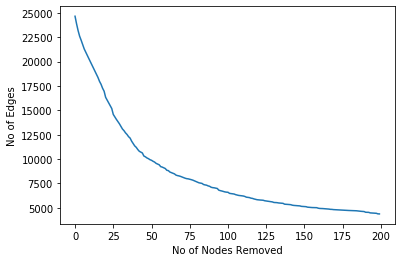

In [107]:
plt.plot(edec[0])
plt.ylabel("No of Edges")
plt.xlabel("No of Nodes Removed")

In [ ]:
#LOOKING AT CHANGES

In [110]:
#REACHABLE NODES
reachable_nodes(G)

3260

In [111]:
reachable_nodes(Atemp)

1780

In [112]:
reachable_nodes(Btemp)

1713

In [113]:
reachable_nodes(Ctemp)

1952

In [118]:
#AVERAGE MAXIMUM FLOW
average_max_flow(G,1000,10)

5408897.424

In [119]:
average_max_flow(Atemp,500,10)

255190.158

In [120]:
average_max_flow(Btemp,500,10)

265837.23

In [121]:
average_max_flow(Ctemp,500,10)

420481.802